In [1]:
#Exercício 2

from jax import grad
import jax.numpy as jnp

def metodo_newton(f, df, x0, limite, tol):
    xk = x0
    k = 0
    for k in range(limite):
        fx = f(xk)
    
        if (abs(fx) < tol):
            break

        dfx = df(xk)
        if dfx == 0:
            raise ValueError("Derivada zero. O método de Newton falhou.")
        
        xk = xk - fx / dfx

    return xk, k


def f(x):
     return jnp.exp(x) + 2.0**(-x) + 2.0*jnp.cos(x) - 6.0
    
df = grad(f)

a, b = 1.0, 2.0
x0 = (a + b) / 2.0
tolerancia = 1e-6

raiz, passos = metodo_newton(f, df, x0, 100, tolerancia)
print(f"Raiz encontrada: {raiz:.6f}\nNúmero de passos: {passos}")


Raiz encontrada: 1.829383
Número de passos: 4


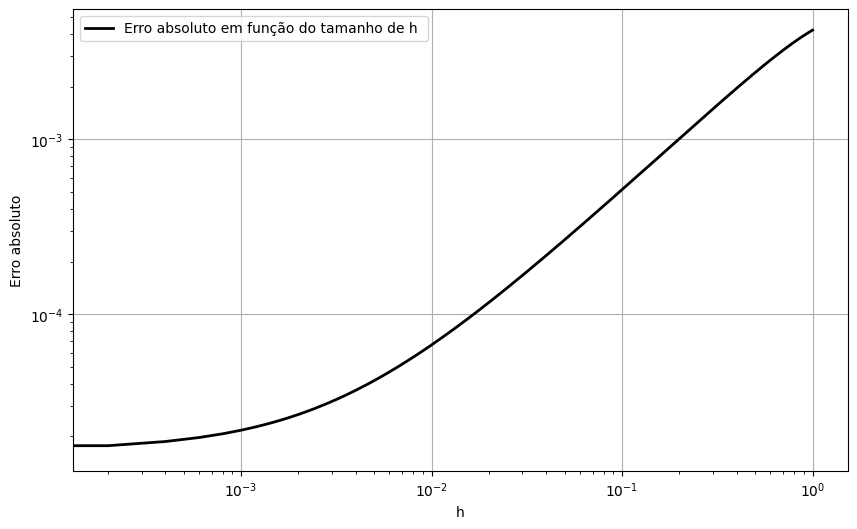

In [2]:
#exercico 1
from math import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt

def f(x): #funcao desejada
    return sin(x)

def g(x): #derivada da funcao exata 
    return cos(x)

n = 5000
x = np.linspace(0,1,n)
h = 0.01
x0 = g(1) #ponto dado x = 1
solucao = np.zeros(n)
solucao[0] = x0
h_plotagem = np.linspace(0,1,n)
erro = np.zeros(n)
for i in range(n-1):
    solucao[i] = (f(x[i]+h)-f(x[i]))/h
    erro[i] = np.abs(solucao[i]-g(x[i]))

solucao[-1] = solucao[-2] #correcao do ultimo valor
erro[-1] = erro[-2]

plt.figure(figsize=(10,6))
plt.plot(h_plotagem,erro,label='Erro absoluto em função do tamanho de h ', color='black', linewidth=2)
plt.grid(True)
plt.xlabel('h')
plt.ylabel('Erro absoluto')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


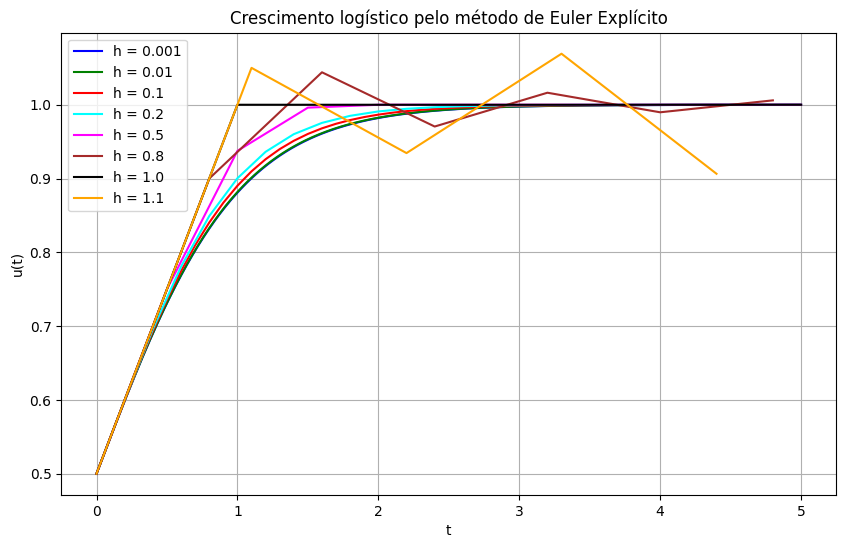

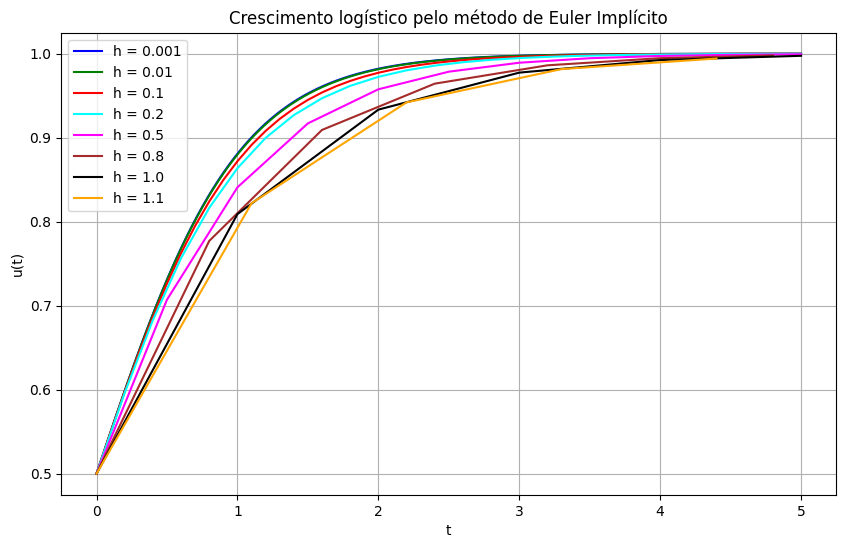

In [3]:
#Exercício 3, euler explícito


def euler_explicito(f, t0, tf, h, y0):
    N = int((tf - t0) / h)
    
    t_values = [t0]
    y_values = [y0]

    for i in range(N):
        prev = y0
        y0 = y0 + h * f(y0, t0)
        t0 = t0 + h
        t_values.append(t0)
        y_values.append(y0)


    return t_values, y_values




def euler_implicito(f, df, t0, tf, h, y0, tol, limite):
        N = int((tf - t0) / h)
        t_values = [t0]
        y_values = [y0]


        for i in range (int(N)):
            t_next = t0 + h

            G = lambda y: y - y0 - h * f(y, t_next)

            dGdy = lambda y: 1 - h * df(y, t_next)

            x0 = y0 + h * f(y0, t0)  # chute inicial preditivo para o método de Newton

            y0, k = metodo_newton(G, dGdy, x0, limite, tol=tol)

            if(k == limite -1):
                print(f"Warning: Newton's method did not converge at step {i+1}")
                break

            t0 = t_next
            t_values.append(t0)
            y_values.append(y0)

        return t_values, y_values





def f(u, t):
    return 2.0*(u - u**2.0)

df = grad(f)  # Derivada em relação a u

valores_h = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 1.1]
y0 = 0.5
t0, tf = 0.0, 5.0



cores = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown', 'black', 'orange']
plt.figure(figsize=(10, 6))

for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_explicito(f, t0, tf, h, y0)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Explícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize=(10, 6))
for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_implicito(f, df, t0, tf, h, y0, tol=1e-6, limite=100)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Implícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()


In [4]:
#Exercício 3, parte 2
